<a href="https://colab.research.google.com/github/Strix9289/Introduction-of-Deep-Learning/blob/master/overtraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 過学習
- 学習：既知のデータに対して正確に予想すること
- 目的：未知のデータに対して正確に予想すること

学習が進みすぎると、既知のデータが持つそれ自身には意味がないような**ノイズや外れ値に対する情報**まで学習してしまい、精度が落ちてしまいます。

過学習が起こると、**訓練データに対する適応率は高いが、テストデータに対する適応率が低い状態**になります。一方訓練データに対する適応率が低い状態を学習不足といいます。

+ #### 正則化
    * #### L2正則化
    * #### L1正則化
    * #### ElasticNet
+ #### 早期終了
+ #### ドロップアウト


# 使用するモデル

In [2]:
pip install mglearn

     |████████████████████████████████| 542kB 2.8MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=a6cc38774db44b885e2674ed2f3f17adee46dc0971b903c8398b9146f1c3c470
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [18]:
import mglearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
%matplotlib inline

In [5]:
x,y = mglearn.datasets.load_extended_boston()
df_x = pd.DataFrame(x)
df_y = pd.DataFrame(y)

In [6]:
#家賃にまつわる104の項目
df_x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.000000e+00,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0324,0.012207,0.0,0.056667,0.103951,0.115489,0.048457,0.0,0.037443,0.051702,0.18,0.016142,0.004599,0.0,...,0.065486,0.090426,0.314815,0.028233,0.333512,0.370531,0.155466,0.000000,0.120130,0.165879,0.577505,0.051791,0.411659,0.172723,0.000000,0.133464,0.184291,0.641607,0.057539,0.072470,0.000000,0.055998,0.077324,0.269203,0.024142,0.000000,0.000000,0.000000,0.000000,0.000000,0.043270,0.059749,0.208015,0.018655,0.082503,0.287234,0.025759,1.000000,0.089680,0.008042
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,5.565944e-08,0.0,0.000057,0.0,0.000041,0.000129,0.000185,0.000082,0.000010,0.000025,0.000131,0.000236,0.000048,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.058710,0.0,...,0.018142,0.095613,0.172840,0.035341,0.300301,0.428917,0.191230,0.023826,0.057519,0.303148,0.547998,0.112049,0.612617,0.273132,0.034030,0.082153,0.432982,0.782698,0.160038,0.121774,0.015172,0.036628,0.193043,0.348962,0.071352,0.001890,0.004564,0.024052,0.043478,0.008890,0.011017,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,5.555343e-08,0.0,0.000057,0.0,0.000041,0.000164,0.000141,0.000082,0.000010,0.000025,0.000130,0.000233,0.000015,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.058710,0.0,...,0.018142,0.095613,0.171066,0.010969,0.482172,0.416202,0.242314,0.030191,0.072884,0.384128,0.687260,0.044070,0.359259,0.209162,0.026060,0.062912,0.331573,0.593231,0.038040,0.121774,0.015172,0.036628,0.193043,0.345381,0.022147,0.001890,0.004564,0.024052,0.043032,0.002759,0.011017,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,8.572933e-08,0.0,0.000018,0.0,0.000044,0.000193,0.000129,0.000131,0.000025,0.000020,0.000190,0.000291,0.000010,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.003975,0.0,...,0.010033,0.097474,0.149346,0.005015,0.433695,0.290958,0.295391,0.057266,0.043987,0.427360,0.654786,0.021988,0.195198,0.198173,0.038418,0.029510,0.286708,0.439284,0.014751,0.201192,0.039004,0.029960,0.291077,0.445977,0.014976,0.007561,0.005808,0.056429,0.086459,0.002903,0.004461,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,4.971238e-07,0.0,0.000044,0.0,0.000106,0.000484,0.000373,0.000316,0.000061,0.000047,0.000458,0.000705,0.000070,0.0000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.003975,0.0,...,0.010033,0.097474,0.150206,0.014921,0.472113,0.363012,0.308197,0.059748,0.045894,0.445887,0.687105,0.068255,0.279123,0.236976,0.045941,0.035289,0.342847,0.528321,0.052482,0.201192,0.039004,0.029960,0.291077,0.448545,0.044557,0.007561,0.005808,0.056429,0.086957,0.008638,0.004461,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [7]:
#家賃
df_y

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [29]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(379, 104) (127, 104) (379,) (127,)


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

In [15]:
# 学習済みモデルの評価
def get_score(model):  
  score = model.evaluate(x_test, y_test, verbose=0)
  print("Test loss:\t", score[0])
  print("Test MAE:\t", score[1])

In [58]:
model = keras.models.Sequential([
  Dense(64,activation='relu', input_shape=(104,)),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(32, activation='relu'),
  Dense(16, activation='relu'),
  Dense(1)
])

model.compile(optimizer='adam', 
              loss='mse',
              metrics=['mae'])

In [59]:
result = model.fit(x_train, y_train, 
                    epochs=100,
                    batch_size=32,
                    verbose=0,
                    validation_data=(x_test, y_test))

In [60]:
result = pd.DataFrame(result.history)

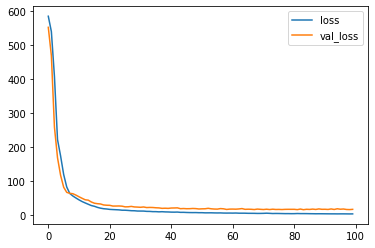

In [61]:
# 目的関数の可視化
result[['loss','val_loss']].plot();

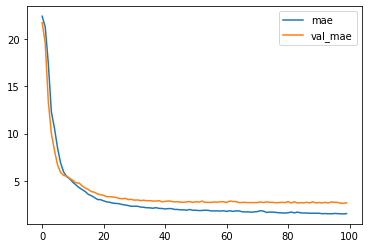

In [62]:
result[['mae', 'val_mae']].plot();

In [63]:
get_score(model)

Test loss:	 17.565637588500977
Test MAE:	 2.708491563796997


# 正則化(regularization)

使うパラメータの数をなるべく少なくなるように学習をする
→損失関数にパラメタの大きさに対するペナルティ項(正則化項)


## L2正則化：Ridge回帰

L2正則化では、全パラメータの2乗和を正則化項として損失関数に加えます。

L2正則化では、パラメータを完全に0にすることは少ないものの、パラメータを滑らかにすることで予測精度のより良いモデルを構築します。

Kerasでは`keras.regularizers.l2`として定義されていますが、実際には各layerにregularizerとして引数で指定して用います。

なお、`keras.regularizers.l2`は引数として、正則化項に掛かる係数を指定できます。

```py
from keras.layers import Dense
from keras import regularizers
model.add(Dense(128, kernel_regularizer=regularizers.l2(0.01))
```

<small>

<参考>
$\Theta$：パラメータ、$\lambda$：係数（＝引数）
$$
    \mathrm{E}(\boldsymbol{w}) = \sum^{N}_{n=1}\sum^{K}_{k=1} t^{(n)}_{k} \ln y^{(n)}_k + \lambda \sum_{i}w_i^2
$$

</small>

In [53]:
model_ridge = keras.models.Sequential([
  Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.01), input_shape=(104,)),
  Dense(64, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  Dense(32, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  Dense(16, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
  Dense(1)
])

model_ridge.compile(optimizer='adam', 
              loss='mse',
              metrics=['mae'])

In [54]:
result_ridge = model_ridge.fit(x_train, y_train, 
                    epochs=100,
                    batch_size=32,
                    verbose=0,
                    validation_data=(x_test, y_test))

In [55]:
result_ridge = pd.DataFrame(result_ridge.history)

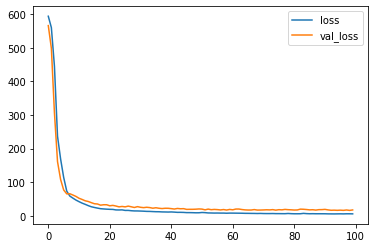

In [56]:
# 目的関数の可視化
result_ridge[['loss','val_loss']].plot();

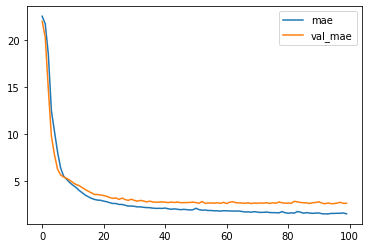

In [57]:
result_ridge[['mae', 'val_mae']].plot();

In [64]:
get_score(model_ridge)

Test loss:	 17.501726150512695
Test MAE:	 2.679816722869873


## L1正則化：Lasso回帰

L1正則化では、全パラメータの絶対値の和を正則化項として損失関数に加えます。

L1正則化ではL2正則化よりもパラメータが0になりやすいという特徴（**スパース性**）があります。

Kerasでは`keras.regularizers.l1`として定義されていますが、実際には各layerにregularizerとして引数で指定して用います。

なお、`keras.regularizers.l1`は引数として、正則化項に掛かる係数を指定できます。

```py
from keras.layers import Dense
from keras import regularizers
model.add(Dense(128, kernel_regularizer=regularizers.l1(0.01))
```
<small>

<参考>
$\boldsymbol{w}$：パラメータ、$\lambda$：係数（＝引数）
$$
    \mathrm{E}(\boldsymbol{w}) = \sum^{N}_{n=1}\sum^{K}_{k=1} t^{(n)}_{k} \ln y^{(n)}_k + \lambda \sum_{i}|w_i|
$$

</small>

## ElasticNet

L1正則化とL2正則化の組み合わせです。

Kerasでは`keras.regularizers.l1_l2`として定義されていますが、実際には各layerにregularizerとして引数で指定して用います。

なお、`keras.regularizers.l1_l2`は引数として、各々の正則化項に掛かる係数を指定できます。

```py
from keras.layers import Dense
from keras import regularizers
model.add(Dense(128, kernel_regularizer=regularizers.l1_l2(l1=0.01,l2=0.01))
```
<small>

<参考>
$\boldsymbol{w}$：パラメータ、$\lambda$：係数、$\alpha$：L1正則化とL2正則化の割合
$$
    \mathrm{E}(\boldsymbol{w}) = \sum^{N}_{n=1}\sum^{K}_{k=1} t^{(n)}_{k} \ln y^{(n)}_k + \lambda \sum_{i}[\alpha|w_i|+(1-\alpha)w_i^2]
$$
よくある定義式としては上の通りですが、Kerasの実装との対応は、
$$
    l1=\lambda\alpha, \quad l2=\lambda(1-\alpha) \Leftrightarrow \lambda=l1+l2, \quad \alpha = \frac{l1}{l1+l2}
$$
</small>

## 早期終了
`Keras`ではcallbackという機能を使って各エポック毎のモデルにパラメータを保存し、

検証データのコストが大きくなったら前のエポックのパラメータを使用するようにします。

`model.fit`の引数に以下のように設定します。

```py
model.fit(x=x_train, y=y_train, ...,
    callbacks=keras.callbacks.EarlyStopping(patience=0, verbose=1))
```

参考：https://keras.io/ja/callbacks/#earlystopping


## ドロップアウト
過学習で余計に学習している部分に着目すると、それは統計的なばらつきと言えるような部分でした。

こうした確率的なばらつきは、一般に大量に足し合わせると相殺されます。

そこで、訓練データセットから部分訓練データセットを大量に作成し、各モデルの予測結果を平均するアンサンブルという手法が用いられることがあります。

このアンサンブル法は大変魅力的な手法なのですが、とてつもない計算量を要するためそのまま用いることは難しいものでした。

そこで出てきたものが、**ドロップアウト (dropout)**と呼ばれる手法で、これは近似的にアンサンブル法を実現するものになっています。

具体的には、ドロップアウトは入力の一部をランダムに0にして出力するlayerの一種です。要するに一部のユニットを取り除いた状況を再現します。

このユニットの除去を確率的に行い、一部のユニットが除去された部分ネットワークに対して学習することを繰り返すことで、

多数のモデルを同時に訓練することと同じ効果を再現しているわけです。

Kerasでは、`keras.layers.core.Dropout`クラスを用いて実装できます。

```py
keras.layers.core.Dropout(rate, noise_shape=None, seed=None)
```

主な引数は、

* rate: 入力を0にする確率、0～1の実数値
* seed: 乱数のシード値

です。（入力と出力でshapeは変わりません）

参考：https://keras.io/ja/layers/core/#dropout

# バッチ学習



<ul>
    <li><strong>バッチ学習（一括学習、batch learning）</strong>
    <ul>データセット全体を一度に全て使用してパラメータを決定</ul>
    </li>
    <li><strong>オンライン学習（逐次学習、online learning）</strong>
    <ul>データセット全体を持っているが、学習を1データ毎に繰り返す</ul>
    <ul>（or データが1つずつ時系列として与えられるので、そのたびに学習を行い、パラメータを更新（ストリーム学習））</ul>
    </li>
</ul>

オンライン学習とバッチ学習を比較すると、次のような特徴があります。

<ul>
    <li>オンライン学習では1度の学習に使用するデータが1つなので、省メモリ</li>
    <li>バッチ学習ではスカラー計算ではなくベクトル・行列計算を行うので、SIMDやGPU等により高速化されやすい
    </li>
</ul>

これらの特徴は互いにトレードオフの関係となっています。

そこで、これらのいいとこどりをしようと考えられたのが、**ミニバッチ (mini-batch)**です。

データセットを少数のデータ集合、つまりミニバッチに分割し、このミニバッチごとに学習を行うということです。

ミニバッチの利用により、使用メモリ量を抑えつつ、高速なベクトル・行列計算能力を利用することができます。

そのため、MLPではミニバッチを利用した学習を行うことが標準的ですし、本講義でもミニバッチを利用した学習方法を採用しています。